# Day 25: Work with Image Data 2
1. Mô tả:
- Bộ lọc Gauss (Gaussian Blur) là một kỹ thuật xử lý ảnh phổ biến được sử dụng để làm mịn ảnh và loại bỏ nhiễu. Nó hoạt động bằng cách áp dụng một ma trận Gauss (Gaussian kernel) lên từng pixel của ảnh
- Hàm Gauss là một hàm phân phối xác xuất có dạng hình chuông. Giá trị của hàm Gauss tại mỗi pixel được xác định bởi độ lệch chuẩn (sigma) của hàm. Sigma càng lớn, mức độ làm mịn càng cao. Công thức tổng quát của Gaussian Filter như sau:

$$
\text{G}(x, y) = \frac{1}{2\pi\sigma^2} \cdot \exp \left( -\frac{x^2 + y^2}{2\sigma^2} \right)
$$
+ OpenCV cung cấp hai hàm để thực hiện bộ lọc Gauss:

- cv2.filter2D: Hàm này cho phép áp dụng một ma trận tùy ý lên ảnh, bao gồm cả ma trận Gauss. Ví dụ:



In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt


def gaussian_kernel(size, sigma):
	if size % 2 == 0:
		size = size + 1
	max_point = size // 2

	min_point = -max_point

	K = np.zeros((size, size))
	for x in range(min_point, max_point + 1):
		for y in range(min_point, max_point + 1):
			value = (1 / (2 * np.pi * sigma ** 2)) * np.exp(-((x ** 2 + y ** 2) / (2 * sigma ** 2)))
			K[x - min_point, y - min_point] = value
	return K




2. Bài tập: Dữ liệu ảnh Y Khoa 
- Hãy đọc và hiển thị ảnh có tên 2.jpg trong tập dữ liệu trên, áp dụng kỹ thuật Gaussian Filter trong thư viện OpenCV theo 2 cách cài đặt với các sigma khác nhau [2.5,5.0,10.0]

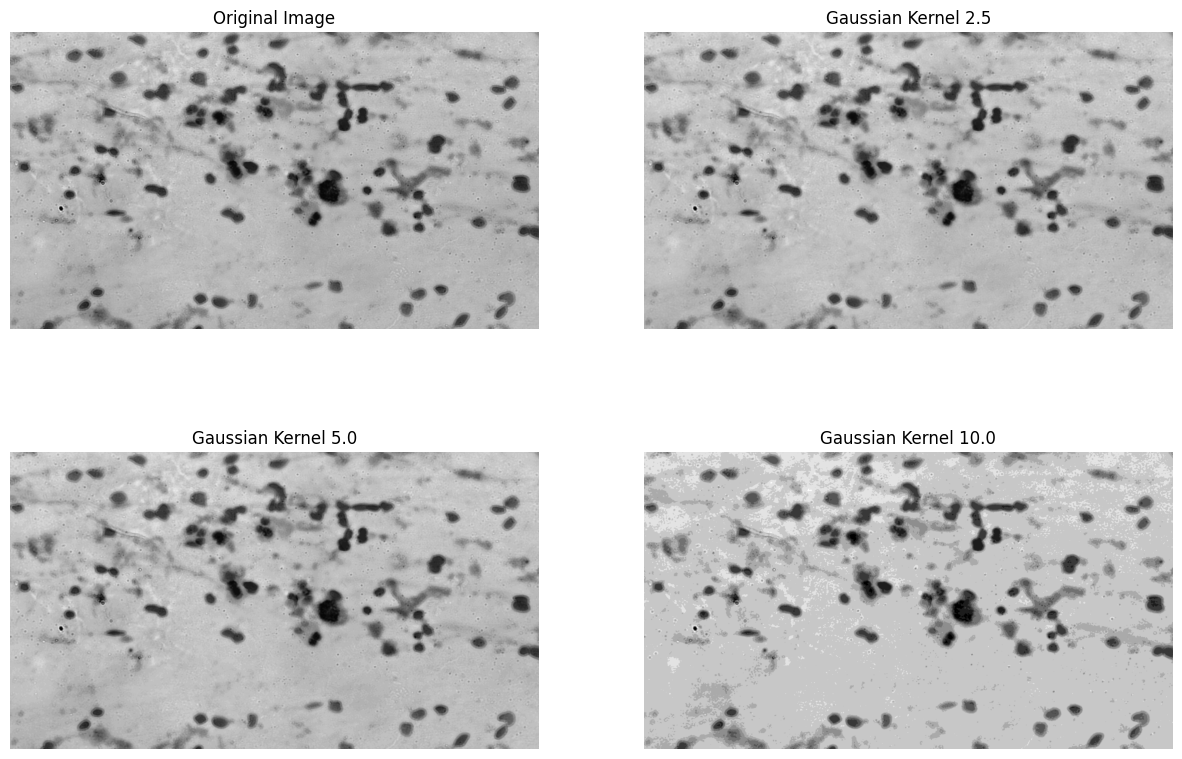

In [3]:
sigmas = [2.5, 5.0, 10.0]
image_path = "data/2.jpg"
img = cv2.imread(image_path, 0)

plt.figure(figsize = (15, 10))
plt.subplot(2, 2, 1)
plt.imshow(img, cmap = 'gray')
plt.title('Original Image')
plt.axis('off')

for i, sigma in enumerate(sigmas):
	kernel = gaussian_kernel(5, sigma)
	img_gaussian = cv2.filter2D(img, -1, kernel)
	plt.subplot(2, 2, i + 2)
	plt.title(f"Gaussian Kernel {sigma}")
	plt.imshow(img_gaussian, cmap = 'gray')
	plt.axis('off')
